In [1]:
# inspired by: 
# !pip install -qU \
#     langchain-openai==0.1.9 \
#     langchain==0.2.5 \
#     langchain-core==0.2.9 \
#     langgraph==0.1.1 \
#     serpapi==0.1.5 \
#     google-search-results==2.4.2

In [42]:
from typing import TypedDict, Annotated
from langchain_core.agents import AgentAction
from langchain_core.messages import BaseMessage
import operator


class AgentState(TypedDict):
   input: str
   chat_history: list[BaseMessage]
   intermediate_steps: Annotated[list[tuple[AgentAction, str]], operator.add]

Function to fetch abstracts from arxiv papers.

In [43]:
from langchain_core.tools import tool
import re
import requests


@tool("fetch_arxiv")
def fetch_arxiv(arxiv_id: str):
   """Gets the abstract from an ArXiv paper given the arxiv ID. Useful for
   finding high-level context about a specific paper."""
   # get paper page in html
   abstract_pattern = re.compile(
    r'<blockquote class="abstract mathjax">\s*<span class="descriptor">Abstract:</span>\s*(.*?)\s*</blockquote>',
    re.DOTALL)
   res = requests.get(
       f"https://export.arxiv.org/abs/{arxiv_id}"
   )
   # search html for abstract
   re_match = abstract_pattern.search(res.text)
   # return abstract text
   return re_match.group(1)

In [44]:
arxiv_id = "2106.04561"
print(
    fetch_arxiv.invoke(input={"arxiv_id": arxiv_id})
)

We propose a safe DRL approach for autonomous vehicle (AV) navigation through
crowds of pedestrians while making a left turn at an unsignalized intersection.
Our method uses two long-short term memory (LSTM) models that are trained to
generate the perceived state of the environment and the future trajectories of
pedestrians given noisy observations of their movement. A future collision
prediction algorithm based on the future trajectories of the ego vehicle and
pedestrians is used to mask unsafe actions if the system predicts a collision.
The performance of our approach is evaluated in two experiments using the
high-fidelity CARLA simulation environment. The first experiment tests the
performance of our method at intersections that are similar to the training
intersection and the second experiment tests our method at intersections with a
different topology. For both experiments, our methods do not result in a
collision with a pedestrian while still navigating the intersection at a
reas

In [46]:
from serpapi import GoogleSearch
import os
import getpass

serpapi_params = {
    "engine": "google",
    "api_key": os.getenv("SERPAPI_KEY") or getpass("SerpAPI key: ")
}

search = GoogleSearch({
    **serpapi_params,
    "q": "Owls"
})

results = search.get_dict()["organic_results"]
results

[{'position': 1,
  'title': 'Owl',
  'link': 'https://en.wikipedia.org/wiki/Owl',
  'redirect_link': 'https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://en.wikipedia.org/wiki/Owl&ved=2ahUKEwiNiaCY1faHAxWRF1kFHYz8DEUQFnoECGQQAQ',
  'displayed_link': 'https://en.wikipedia.org › wiki › Owl',
  'thumbnail': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRI14fBM6nP9tJFH0uEWxG8Zrpnwf6MRzYX5FABjslxTN0RQcTS2s2c&usqp=CAE&s',
  'favicon': 'https://serpapi.com/searches/66bdc7dec97e3566b193cd4f/images/40438073b11f55277a27533c9cd082537397bb214283074c7c3d6910fee3a647.png',
  'snippet': 'Owls are birds from the order Strigiformes which includes over 200 species of mostly solitary and nocturnal birds of prey typified by an upright stance, ...',
  'snippet_highlighted_words': ['Owls'],
  'source': 'Wikipedia'},
 {'position': 2,
  'title': 'Owls Browse by Shape, All About Birds, Cornell Lab of ...',
  'link': 'https://www.allaboutbirds.org/guide/browse/shape/Owls',
  'redi

In [47]:
contexts = "\n---\n".join(
    ["\n".join([x["title"], x["snippet"], x["link"]]) for x in results]
)

In [48]:
print(contexts)

Owl
Owls are birds from the order Strigiformes which includes over 200 species of mostly solitary and nocturnal birds of prey typified by an upright stance, ...
https://en.wikipedia.org/wiki/Owl
---
Owls Browse by Shape, All About Birds, Cornell Lab of ...
Bird GuideBrowse by Shape · Owls · Antillean Nighthawk · Barn Owl · Barred Owl · Boreal Owl · Burrowing Owl · Chuck-will's-widow · Common Nighthawk.
https://www.allaboutbirds.org/guide/browse/shape/Owls
---
Owl | Types, Species, & Facts
Owl, (order Strigiformes), any member of a homogeneous order of primarily nocturnal raptors found nearly worldwide. The bird of Athena, ...
https://www.britannica.com/animal/owl
---
about owls
Like hawks and eagles, owls are called raptors, or birds of prey, which means they use sharp talons and curved bills to hunt, kill, and eat other animals.
https://www.owlresearchinstitute.org/owls-1
---
Owl - Harry Potter Wiki - Fandom
An owl was a magical bird of prey. Normally, most British owls were nocturnal

In [49]:
@tool("web_search")
def web_search(query: str):
   """Finds general knowledge information using Google search. Can also be used
   to augment more 'general' knowledge to a previous specialist query."""
   search = GoogleSearch({
       **serpapi_params,
       "q": query,
       "num": 5
   })
   results = search.get_dict()["organic_results"]
   contexts = "\n---\n".join(
       ["\n".join([x["title"], x["snippet"], x["link"]]) for x in results]
   )
   return contexts

In [50]:
web_search.invoke(input={"query": "How to leverage large language models in business?"})

'How to Leverage Large Language Models for Business\nLLMs are highly effective models for language translation, enabling businesses to translate content quickly and accurately. By training an LLM ...\nhttps://www.allganize.ai/en/blog/how-to-leverage-large-language-models-for-business-best-practices-and-case-studies\n---\n6 ideas to leverage large language models\nLarge language models are transforming industries. Discover 6 innovative ideas to use this powerful AI program.\nhttps://www.softwebsolutions.com/resources/potential-ai-large-language-models.html\n---\n10 Ways Businesses Can Leverage Large Language Models\n10 Ways Businesses Can Leverage Large Language Models · 1Enhanced Search and Retrieval · 2Contextual Understanding · 3Semantic Analysis · 4 ...\nhttps://www.devprojournal.com/technology-trends/llms/10-ways-businesses-can-leverage-large-language-models/\n---\nLarge Language Models and AI for business\nWe help you understand Large Language Models (LLMs) and Generative AI and h

In [51]:
@tool("final_answer")
def final_answer(
   introduction: str,
   research_steps: str,
   main_body: str,
   conclusion: str,
   sources: str
):
   """Returns a natural language response to the user in the form of a research
   report. There are several sections to this report, those are:
   - `introduction`: a short paragraph introducing the user's question and the
   topic we are researching.
   - `research_steps`: a few bullet points explaining the steps that were taken
   to research your report.
   - `main_body`: this is where the bulk of high quality and concise
   information that answers the user's question belongs. It is 3-4 paragraphs
   long in length.
   - `conclusion`: this is a short single paragraph conclusion providing a
   concise but sophisticated view on what was found.
   - `sources`: a bulletpoint list provided detailed sources for all information
   referenced during the research process
   """
   if type(research_steps) is list:
       research_steps = "\n".join([f"- {r}" for r in research_steps])
   if type(sources) is list:
       sources = "\n".join([f"- {s}" for s in sources])
   return ""

In [52]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


system_prompt = """You are the oracle, the great AI decision maker.
Given the user's query you must decide what to do with it based on the
list of tools provided to you.


If you see that a tool has been used (in the scratchpad) with a particular
query, do NOT use that same tool with the same query again. Also, do NOT use
any tool more than twice (ie, if the tool appears in the scratchpad twice, do
not use it again).


You should aim to collect information from a diverse range of sources before
providing the answer to the user. Once you have collected plenty of information
to answer the user's question (stored in the scratchpad) use the final_answer
tool."""


prompt = ChatPromptTemplate.from_messages([
   ("system", system_prompt),
   MessagesPlaceholder(variable_name="chat_history"),
   ("user", "{input}"),
   ("assistant", "scratchpad: {scratchpad}"),
])

In [67]:
from langchain_core.messages import ToolCall, ToolMessage
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(
   model="gpt-4o",
   openai_api_key=os.environ["OPENAI_API_KEY"],
   temperature=0
)

In [54]:
tools = [fetch_arxiv, web_search, final_answer]

In [68]:
# define a function to transform intermediate_steps from list
# of AgentAction to scratchpad string
def create_scratchpad(intermediate_steps: list[AgentAction]):
   research_steps = []
   for i, action in enumerate(intermediate_steps):
       if action.log != "TBD":
           # this was the ToolExecution
           research_steps.append(
               f"Tool: {action.tool}, input: {action.tool_input}\n"
               f"Output: {action.log}"
           )
   return "\n---\n".join(research_steps)


oracle = (
   {
       "input": lambda x: x["input"],
       "chat_history": lambda x: x["chat_history"],
       "scratchpad": lambda x: create_scratchpad(
           intermediate_steps=x["intermediate_steps"]
       ),
   }
   | prompt
   | llm.bind_tools(tools, tool_choice="any")
)

In [56]:
inputs = {
    "input": "How to uselarge language models to build a pancake business?",
    "chat_history": [],
    "intermediate_steps": [],
}
out = oracle.invoke(inputs)
out

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xGVWrK4rSf26lt5h44himARz', 'function': {'arguments': '{"query":"using large language models to build a pancake business"}', 'name': 'web_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 468, 'total_tokens': 488}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'stop', 'logprobs': None}, id='run-5c8fd7c9-aa16-41f5-a8b7-b97e7834cfbf-0', tool_calls=[{'name': 'web_search', 'args': {'query': 'using large language models to build a pancake business'}, 'id': 'call_xGVWrK4rSf26lt5h44himARz'}], usage_metadata={'input_tokens': 468, 'output_tokens': 20, 'total_tokens': 488})

In [57]:
out.tool_calls[0]["name"]

'web_search'

In [58]:
out.tool_calls[0]["args"]

{'query': 'using large language models to build a pancake business'}

In [59]:
from typing import TypedDict


def run_oracle(state: TypedDict):
   print("run_oracle")
   print(f"intermediate_steps: {state['intermediate_steps']}")
   out = oracle.invoke(state)
   tool_name = out.tool_calls[0]["name"]
   tool_args = out.tool_calls[0]["args"]
   action_out = AgentAction(
       tool=tool_name,
       tool_input=tool_args,
       log="TBD"
   )
   return {
       "intermediate_steps": [action_out]
   }


def router(state: TypedDict):
   # return the tool name to use
   if isinstance(state["intermediate_steps"], list):
       return state["intermediate_steps"][-1].tool
   else:
       # if we output bad format go to final answer
       print("Router invalid format")
       return "final_answer"

In [60]:
tool_str_to_func = {
   "fetch_arxiv": fetch_arxiv,
   "web_search": web_search,
   "final_answer": final_answer
}


def run_tool(state: TypedDict):
   # use this as helper function so we repeat less code
   tool_name = state["intermediate_steps"][-1].tool
   tool_args = state["intermediate_steps"][-1].tool_input
   print(f"{tool_name}.invoke(input={tool_args})")
   # run tool
   out = tool_str_to_func[tool_name].invoke(input=tool_args)
   action_out = AgentAction(
       tool=tool_name,
       tool_input=tool_args,
       log=str(out)
   )
   return {"intermediate_steps": [action_out]}

In [61]:
from langgraph.graph import StateGraph, END


# initialize the graph with our AgentState
graph = StateGraph(AgentState)

# add nodes
graph.add_node("oracle", run_oracle)
graph.add_node("fetch_arxiv", run_tool)
graph.add_node("web_search", run_tool)
graph.add_node("final_answer", run_tool)

# specify the entry node
graph.set_entry_point("oracle")

# add the conditional edges which use the router
graph.add_conditional_edges(
   source="oracle",  # where in graph to start
   path=router,  # function to determine which node is called
)

# create edges from each tool back to the oracle
for tool_obj in tools:
   if tool_obj.name != "final_answer":
       graph.add_edge(tool_obj.name, "oracle")
       
# if anything goes to final answer, it must then move to END
graph.add_edge("final_answer", END)

# finally, we compile our graph
runnable = graph.compile()

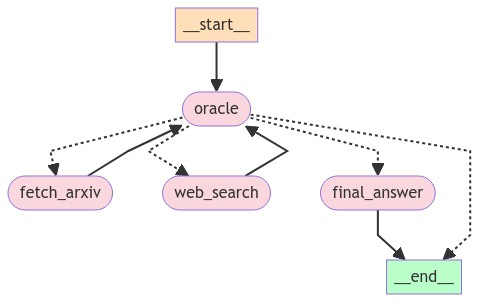

In [62]:
from IPython.display import Image

Image(runnable.get_graph().draw_mermaid_png())

In [69]:
# research_topic = "Write a report explaining 5 ways through which LLMs can be used to enhance human research. Make sure to include all the sources used with their respective urls."
# research_topic = """The Impact of Remote Work on Employee Productivity and Organizational Culture in Tech Startups. Include the resources urls mixed in the report."""
# research_topic = "Sustainable Coffee Supply Chain Management: Optimizing Business Practices for Ethical Sourcing and Environmental Impact"
research_topic = "Write a research report about how coffee impacts productivity in startup culture? Include all the urls in the reference section in markdown format."
out = runnable.invoke({
    "input": research_topic,
    "chat_history": [],
})

run_oracle
intermediate_steps: []
web_search.invoke(input={'query': 'how coffee impacts productivity in startup culture'})
run_oracle
intermediate_steps: [AgentAction(tool='web_search', tool_input={'query': 'how coffee impacts productivity in startup culture'}, log='TBD'), AgentAction(tool='web_search', tool_input={'query': 'how coffee impacts productivity in startup culture'}, log="Coffee in the Workplace: Fueling Productivity and ...\nCoffee not only enhances individual productivity but also has a positive impact on team dynamics. When employees gather around the coffee ...\nhttps://www.linkedin.com/pulse/coffee-workplace-fueling-productivity-cultivating-mirko-spinella\n---\nHOW COFFEE BREAKS BOOST BUSINESS PRODUCTIVITY\nIncreased motivation and performance: Coffee breaks can provide employees with a sense of autonomy, recognition, and appreciation. They can also ...\nhttps://www.abbusiness.com/2024/02/06/how-coffee-breaks-boost-business-productivity/\n---\nThe Effect of Coffee on Pe

In [70]:
out['intermediate_steps'][-1].tool_input

{'introduction': 'Coffee is a staple in many workplaces, especially in startup cultures where long hours and high demands are common. This research report explores how coffee impacts productivity in startup environments, examining both individual and team dynamics.',
 'research_steps': '1. Conducted a web search to gather information on the impact of coffee on productivity in the workplace.\n2. Reviewed articles and studies that discuss the role of coffee in enhancing individual and team performance.\n3. Compiled findings to provide a comprehensive overview of the topic.',
 'main_body': 'Coffee has long been considered a productivity booster, and its role in startup culture is particularly significant. In startups, where employees often work long hours and face high levels of stress, coffee serves as a crucial tool for maintaining alertness and focus. Research indicates that caffeine, the primary active ingredient in coffee, enhances cognitive functions such as memory, attention, and p

In [71]:
def build_report(output: dict):
   sources = output["sources"]
   if type(sources) is list:
       sources = "\n".join([f"- {s}" for s in sources])
   return f"""
# INTRODUCTION
------------
{output["introduction"]}


# REPORT
------
{output["main_body"]}


# CONCLUSION
----------
{output["conclusion"]}


# SOURCES
-------
{sources}
"""

In [72]:
from IPython.display import Markdown

Markdown(build_report(
    output=out["intermediate_steps"][-1].tool_input
))


# INTRODUCTION
------------
Coffee is a staple in many workplaces, especially in startup cultures where long hours and high demands are common. This research report explores how coffee impacts productivity in startup environments, examining both individual and team dynamics.


# REPORT
------
Coffee has long been considered a productivity booster, and its role in startup culture is particularly significant. In startups, where employees often work long hours and face high levels of stress, coffee serves as a crucial tool for maintaining alertness and focus. Research indicates that caffeine, the primary active ingredient in coffee, enhances cognitive functions such as memory, attention, and problem-solving skills. This makes it easier for employees to tackle complex tasks and maintain high levels of performance throughout the day.

Moreover, coffee breaks can foster a sense of community and collaboration among team members. In startup environments, where teamwork and innovation are key, these breaks provide opportunities for informal discussions and brainstorming sessions. This can lead to increased creativity and the generation of new ideas, which are essential for the growth and success of startups. Additionally, the social aspect of coffee breaks can improve morale and reduce feelings of isolation, which are common in high-pressure work settings.

Studies have also shown that coffee consumption can lead to increased motivation and job satisfaction. The ritual of taking a coffee break can provide employees with a sense of autonomy and recognition, contributing to a more positive work environment. This, in turn, can lead to higher levels of engagement and productivity. Furthermore, the physical act of stepping away from the desk to grab a coffee can help reduce stress and prevent burnout, allowing employees to return to their tasks with renewed energy and focus.


# CONCLUSION
----------
In conclusion, coffee plays a multifaceted role in enhancing productivity in startup cultures. It not only boosts individual cognitive functions but also fosters team collaboration and improves overall job satisfaction. Embracing coffee culture in the workplace can lead to a more motivated, creative, and productive workforce, which is crucial for the success of startups.


# SOURCES
-------
- [Coffee in the Workplace: Fueling Productivity and Cultivating Team Dynamics](https://www.linkedin.com/pulse/coffee-workplace-fueling-productivity-cultivating-mirko-spinella)
- [HOW COFFEE BREAKS BOOST BUSINESS PRODUCTIVITY](https://www.abbusiness.com/2024/02/06/how-coffee-breaks-boost-business-productivity/)
- [The Effect of Coffee on People's Productivity](https://www.linkedin.com/pulse/effect-coffee-peoples-productivity-kurniawan-arif-maspul)
- [Does Coffee Make You More Productive?](https://wanderingbearcoffee.com/blogs/articles/connection-between-coffee-productivity)
- [Why You Should Embrace Coffee Culture in the Workplace](https://www.entrepreneur.com/living/why-you-should-embrace-coffee-culture-in-the-workplace/426364)
